In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [22]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


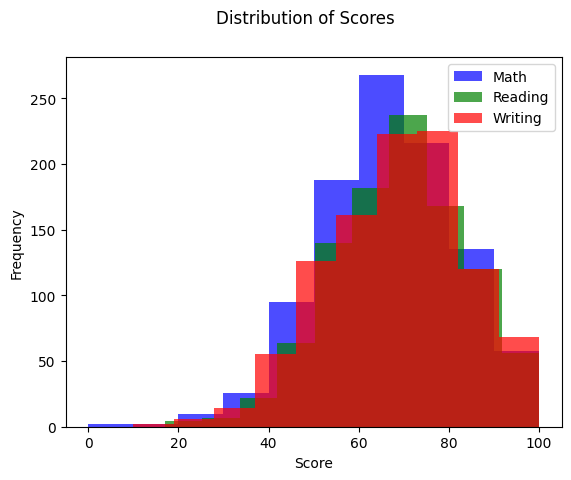

In [26]:
import matplotlib.pyplot as plt

# Plotting histograms for each score separately with corresponding colors
# Accessing columns as Series using single brackets will make hist function treat each as a dataset.
plt.hist(df['math score'], bins=10, color='blue', alpha=0.7, label='Math')
plt.hist(df['reading score'], bins=10, color='green', alpha=0.7, label='Reading')
plt.hist(df['writing score'], bins=10, color='red', alpha=0.7, label='Writing')

plt.suptitle('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend() # Displaying legend to identify each score distribution
plt.show() # Optionally, display the plot

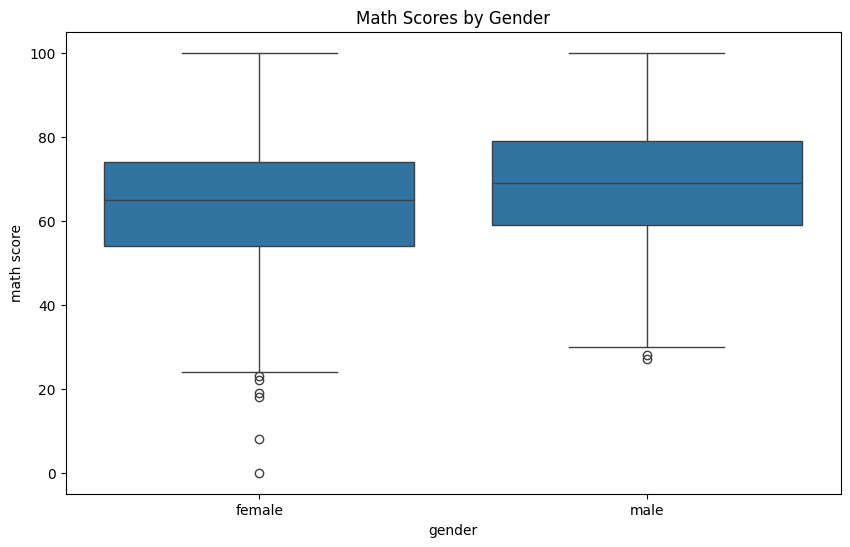

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'gender', y = 'math score', data = df)
plt.title('Math Scores by Gender')
plt.show()

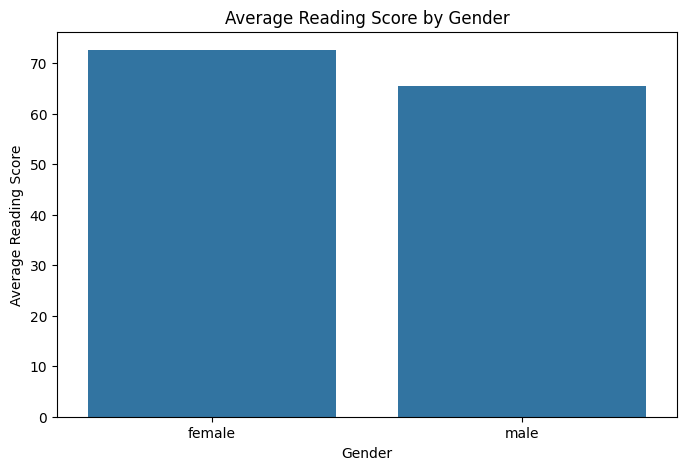

In [28]:
gender_avg_reading = df.groupby("gender")["reading score"].mean().reset_index()
# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="gender", y="reading score", data=gender_avg_reading)
plt.xlabel("Gender")
plt.ylabel("Average Reading Score")
plt.title("Average Reading Score by Gender")
plt.show()

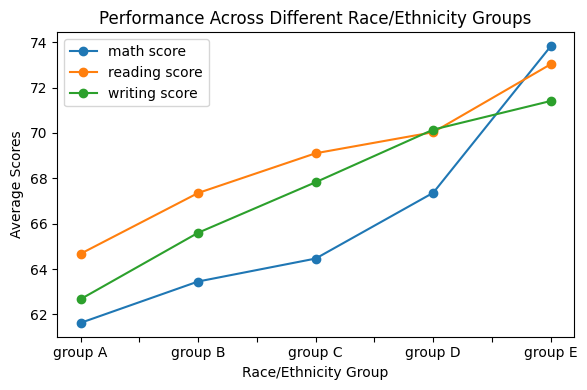

In [29]:
race_scores = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
race_scores.plot(kind='line', marker='o', figsize=(6, 4))
plt.title('Performance Across Different Race/Ethnicity Groups')
plt.xlabel('Race/Ethnicity Group')
plt.ylabel('Average Scores')
plt.tight_layout()
plt.show()
plt.close()

Text(0.5, 1.0, 'Correlation Matrix of Scores')

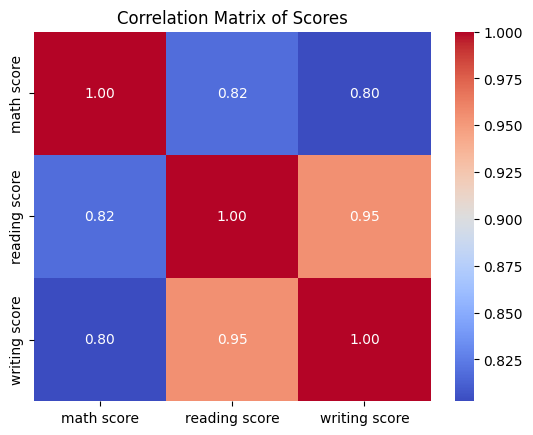

In [31]:
import numpy as np

corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Scores')